In [1]:
import numpy as np 
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

# Hypothesis Testing

Null Hypothesis $H_0: \mu = \mu_0$

Alternative Hypothesis $H_1: \mu \neq \mu_0$ (two-tailed) or $H_1: \mu < \mu_0$ (left-tailed) or $H_1: \mu > \mu_0$ (right-tailed)

$z$-test (Population variance is known):
$$z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}} $$

$t$-test (Population variance is unknown):
$$ t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$$
which follows $t$-distribution with $n-1$ degrees of freedom.


Follow these steps:
- Decide which test-statistic ($z$-test, $t$-test) is suitable for the given settings
- Decide what type of test you need (left-tailed, right-tailed, two-tailed)
- Decide whether accept or reject null hypothesis.

#### Example 1:
Boys of a certain age are known to have a mean weight of $\mu = 85$ pounds. A complaint is made that the boys living in a municipal children's home are underfed. As one bit of evidence, $n=25$ boys (of the same age) are weighed and found to have a mean weight of 
$\bar{x} = 80.94$ pounds. It is known that the population standard deviation $\sigma$ is 11.6 pounds (the unrealistic part of this example!). Based on the available data, what should be concluded concerning the complaint?

Null Hypothesis $H_0: \mu = 85 $

Alternative Hypothesis $H_1: \mu < 85$

Population variance is known, so we apply $z$-test which is left-tailed.


In [2]:
test_statistic = (80.94 - 85) / (11.6 / np.sqrt(25))
test_statistic

-1.750000000000001

In [3]:
#for alpha = 0.05 significance level let find critical value from z-table
alpha = 0.05
critical_value = st.norm.ppf(alpha)
critical_value

-1.6448536269514729

In [4]:
# Compare test statistic and critical value
# to decide whether test-statistic result is inside critical region or not
test_statistic < critical_value


True

In [5]:
# Try to draw the same conclusion using p-value approach
# Calculate p-value using test-statistic and critical-value
p_value = st.norm.cdf(test_statistic)

# Compare p-value and significance level alpha
print(p_value)
print(p_value < alpha)

0.04005915686381699
True


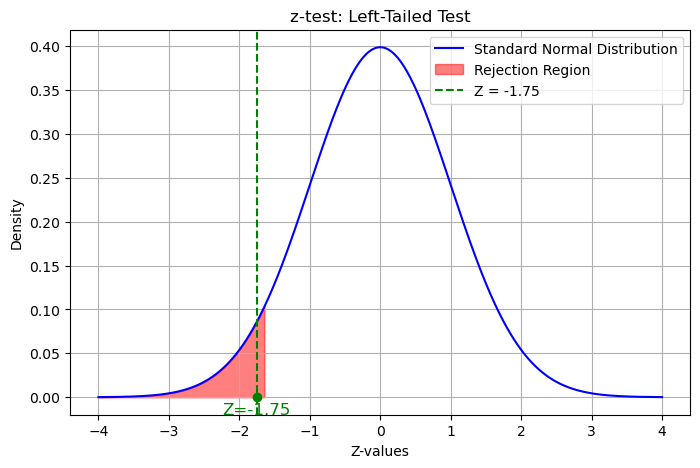

In [6]:
# generate x, y values from normal distn
x = np.linspace(-4, 4, 500)
y = st.norm.pdf(x, 0, 1)  # Standard normal PDF (mean=0, std=1)


plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Standard Normal Distribution", color="blue")

# critical region (left-tailed test)
x_critical = np.linspace(-4, critical_value, 100)
plt.fill_between(x_critical, st.norm.pdf(x_critical, 0, 1), color='red', alpha=0.5, label='Rejection Region')

# Mark the z-value
plt.axvline(test_statistic, color='green', linestyle='--', label=f'Z = {round(test_statistic,2)}')
plt.scatter([test_statistic], [0], color='green', zorder=3)  # Mark the Z-value on the x-axis
plt.text(test_statistic, -0.02, f'Z={round(test_statistic,2)}', color='green', fontsize=12, ha='center')

plt.title('z-test: Left-Tailed Test')
plt.xlabel('Z-values')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


### Example 2:

It is assumed that the mean systolic blood pressure is $\mu = 120$ mm Hg. In the Honolulu Heart Study, a sample of $n=100$ people had an average systolic blood pressure of 130.1 mm Hg with a standard deviation of 21.21 mm Hg. Is the group significantly different (with respect to systolic blood pressure!) from the regular population?

In [ ]:
n = 100

In [ ]:
test_statistic = ...

In [ ]:
#alpha = 0.05 significance level
alpha = 0.05
# define degrees of freedom
df = ...
# find critical value from the test-statistic you use
critical_value = ...

In [ ]:
# Compare the test-statistic and critical value


In [ ]:
# Try to draw the same conclusion using p-value approach
# Calculate p-value using test-statistic and critical-value
p_value = ...

# Compare p-value and significance level alpha

In [ ]:
# Plot your result to see rejection region



# Tests of the Equality of Two Means

### When Population Variances Are Equal - Pooled $t$-test

We have two independent samples from two normal distributions with equal variances $\sigma_X^2 = \sigma_Y^2 = \sigma^2$.

sample $X$ $\rightarrow$ $n$: the number of observations, $S_X^2$: sample variance

sample $Y$ $\rightarrow$ $m$: the number of observations, $S_Y^2$: sample variance

degrees of freedom $df = n + m - 2$

$S_P^2$ is the pooled sample variance such that $ S_P^2 = \frac{(n-1)S_X^2 + (m-1)S_Y^2}{n+m-2} $.

Null Hypothesis $H_0: \mu_X = \mu_Y$

Alternative Hypothesis $H_1: \mu_X \neq \mu_Y$ or $H_1: \mu_X < \mu_Y$ or $H_1: \mu_X > \mu_Y$

Then, the test statistic
$$ T =  \frac{(\bar{X}-\bar{Y}) - (\mu_X - \mu_Y)}{S_P \sqrt{\frac{1}{n} + \frac{1}{m}}} $$



### When Population Variances Are not Equal - Welch's $t$-test

We have two independent samples from two normal distributions with variances $\sigma_X^2$, $\sigma_Y^2$.

Null Hypothesis $H_0: \mu_X = \mu_Y$

Alternative Hypothesis $H_1: \mu_X \neq \mu_Y$ or $H_1: \mu_X < \mu_Y$ or $H_1: \mu_X > \mu_Y$

Then, the test statistic
$$ T =  \frac{(\bar{X}-\bar{Y}) - (\mu_X - \mu_Y)}{\sqrt{\frac{S_X^2}{n} + \frac{S_Y^2}{m}}} $$

Degrees of freedom r (If r doesn't equal an integer, as it usually doesn't, then we take the integer portion of r.)
$$r = \frac{(\frac{S_X^2}{n} + \frac{S_Y^2}{m})^2}{\frac{(S_X^2 / n)^2}{n-1} + \frac{(S_Y^2 / m)^2}{m-1}}  $$


#### Example 3:

A psychologist was interested in exploring whether or not male and female college students have different driving behaviors. There were several ways that she could quantify driving behaviors. She opted to focus on the fastest speed ever driven by an individual. Therefore, the particular statistical question she framed was as follows:
- Is the mean fastest speed driven by male college students different than the mean fastest speed driven by female college students?

She conducted a survey of a random $n=34$ male college students and a random $m=29$ female college students. Here is a descriptive summary of the results of her survey:

$$ \text{Males: } \bar{X} = 105.5, S_X = 20.1, n=34  $$

$$ \text{Females: } \bar{Y} = 90.9, S_Y = 12.2, m=29  $$

Is there sufficient evidence at the $\alpha = 0.05$ significance level to conclude that the mean fastest speed driven by male college students differs from the mean fastest speed driven by female college students?

In [ ]:
#Here is the data given in the example
X_bar = 105.5
S_X = 20.1
Y_bar = 90.9
S_Y = 12.2
n = 34
m = 29
df = n + m - 2
alpha = 0.05


# Apply the test-statistic and see the results
test_statistic = ...

In [ ]:
# find critical value 
critical_value = ...

In [ ]:
# Compare test-statictic and critical value


In [ ]:
# find p-value and compare it with significance level
p_value = ...

In [ ]:
# Plot your results


## Tests for Variances

#### One Variance
A random sample of size $n$ from a normal population with (unknown) mean $\mu$ and variance $\sigma^2$, sample variance S^2 

Null Hypothesis $H_0: \sigma^2 = \sigma_0^2$

Alternative Hypothesis $H_1: \sigma^2 \neq \sigma_0^2$ or $H_1: \sigma^2 < \sigma_0^2$ or $H_1: \sigma^2 > \sigma_0^2$

Then, test statistic (Chi-square)  is:
$$ \mathcal{X}^2 = \frac{(n-1) S^2}{\sigma_0^2}  $$


#### Two Variance
Two random sample from normal distribution
- $X_1, X_2, ..., X_n \rightarrow$ $n$: sample size, $\mu_X$: mean, $\sigma_X^2$: variance
- $Y_1, Y_2, ..., Y_m \rightarrow$ $m$: sample size, $\mu_Y$: mean, $\sigma_Y^2$: variance

Null Hypothesis $H_0: \sigma_X^2 = \sigma_Y^2$

Alternative Hypothesis $H_1: \sigma_X^2 \neq \sigma_Y^2$ or $H_1: \sigma_X^2 < \sigma_Y^2$ or $H_1: \sigma_X^2 > \sigma_Y^2$

Then, test statistic ($F$-test)  is:
$$ F = \frac{S_X^2}{S_Y^2}  $$

#### Example 4:
A manufacturer of hard safety hats for construction workers is concerned about the mean and the variation of the forces its helmets transmits to wearers when subjected to an external force. The manufacturer has designed the helmets so that the mean force transmitted by the helmets to the workers is 800 pounds (or less) with a standard deviation to be less than 40 pounds. Tests were run on a random sample of $n = 40$ helmets, and the sample mean and sample standard deviation were found to be 825 pounds and 48.5 pounds, respectively. Do the data provide sufficient evidence, at the $\alpha = 0.05$ significance level, to conclude that the population standard deviation exceeds 40 pounds?


In [ ]:
n = 40
df = n-1
alpha = 0.05


# compute test statistic
test_statistic = ...

In [ ]:
critical_value = ...

In [ ]:
# Compare critical value and test-statistic

In [ ]:
# find p-value and compare it with significance level
p_value = ...

In [ ]:
# Plot your results


### One-way ANOVA
Let say we have two random sample from normal distribution such that:

- $X_1, X_2, ..., X_n \rightarrow$ $n$: sample size, $\mu_X$: mean, $\sigma_X^2$: variance, $S_X^2$: sample variance
- $Y_1, Y_2, ..., Y_m \rightarrow$ $m$: sample size, $\mu_Y$: mean, $\sigma_Y^2$: variance, $S_Y^2$: sample variance

- Total sum of squares $SST = \sum_{i=1}^{n} (X_i - \bar{Z})^2 + \sum_{j=1}^{m} (Y_j - \bar{Z})^2$

- Sum of squares between-group $SSB = n (\bar{X} - \bar{Z})^2 + m (\bar{Y} - \bar{Z})^2$

- Sum of squares within-group $SSW = (n - 1) S_X^2 + (m - 1) S_Y^2$

- Mean squares between group $MSB = \frac{SSB}{k-1}$ where k is number of groups

- Mean squares within group $MSW = \frac{SSW}{n + m - 2}$

Then, test statistic ($F$-statistic)  is:
$$ F = \frac{MSB}{MSW}  $$


#### Example
A researcher for an automobile safety institute was interested in determining whether or not the distance that it takes to stop a car going 60 miles per hour depends on the brand of the tire. The researcher measured the stopping distance (in feet) of ten randomly selected cars for each of five different brands. So that he and his assistants would remain blinded, the researcher arbitrarily labeled the brands of the tires as Brand1, Brand2, Brand3, Brand4, and Brand5. Do the data provide enough evidence to conclude that at least one of the brands is different from the others with respect to stopping distance?

In [ ]:
# Data is here
brand1 = [194, 184, 189, 189, 188, 186, 195, 186, 183, 188]
brand2 = [189, 204, 190, 190, 189, 207, 203, 193, 181, 206]
brand3 = [185, 183, 186, 183, 179, 191, 188, 196, 189, 194]
brand4 = [183, 193, 184, 186, 194, 199, 196, 188, 193, 196]
brand5 = [195, 197, 194, 202, 200, 211, 203, 206, 202, 195]

In [ ]:
# Let calculate the values in ANOVA table
all_data = np.concatenate([brand1, brand2, brand3, brand4, brand5])
groups = [brand1, brand2, brand3, brand4, brand5]

# Number of groups
k = len(groups)  
# Total sample size
N = len(all_data) 

# Calculate overall mean
overall_mean = np.mean(all_data)

# Sum of Squares Between Groups (SSB)
SSB = ...

# Sum of Squares Within Groups (SSW)
SSW = ...

# Degrees of freedom
df_between = k - 1
df_within = N - k

# Mean Squares
MSB = ...
MSW = ...

# F-statistic
F_statistic = ...

p_value = ...

#ANOVA table
anova_table = pd.DataFrame({
    "Source": ["Between Groups (Factor)", "Within Groups (Error)", "Total"],
    "SS": [SSB, SSW, SSB + SSW],
    "DF": [df_between, df_within, N - 1],
    "MS": [MSB, MSW, None],
    "F": [F_statistic, None, None],
    "p": [p_value, None, None]
})

print(anova_table)


In [ ]:
# To calculate F-statistic and p-value 
# you can also use scipy library
F_statistic, p_value = st.f_oneway(brand1, brand2, brand3, brand4, brand5)
print(F_statistic)
print(p_value)
